## A Guide to PyTorch dataset and DataLoader with MNIST

`torchvision` is a supporting package consisting of popular datasets, model architectures, and common image transformations for computer vision. The most well-known dataset in torchvision is the `MNIST` dataset. In many situations, we train our model with MNIST dataset because it's neatly organized, easy to preprocess and complete. MNIST is a dataset consisting of handwritten images that are normalized and center-cropped. The images are of one channel. It has 60000 training data and 10000 test data. 

To download the MNIST dataset, we use the systax if `torchvision` is installed in your current environment. 
- `torchvision.datasets.MNIST()`
Variables: 
- `root`: string, the location you want to store the dataset
- `train`: bool, if True then download the training dataset else download the testing dataset
- `download`: bool, if True then download the dataset from the Internet
- `transform`: images transformations
- `target_transform`: target (label) transformations

In [1]:
from torchvision.datasets import MNIST
train_set = MNIST(root='./mnist',train=True,download=True)

In [2]:
print(train_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist
    Split: Train


Each data is a `tuple`.

In [3]:
print(train_set[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x1409ED510>, 5)


Show an image

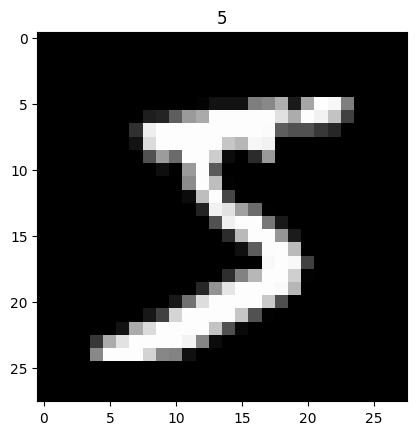

In [6]:
import matplotlib.pyplot as plt

sample_image = train_set[0][0]
sample_image_label = train_set[0][1]

# show the image using Matplotlib
plt.title(sample_image_label)  # set title
plt.imshow(sample_image,cmap='gray')

For a single image, one can assign the picture and label at the same time.

In [3]:
sample_image, sample_image_label = train_set[0]

# plt.title(sample_image_label)  
# plt.imshow(sample_image)

If you to drop the label, you can assign variables like this:

In [6]:
sample_img, _ = train_set[0]
# plt.imshow(sample_img)

However, if you want to perform this operation on `train_set`, it will not work.

In [7]:
train_data, train_label = train_set

ValueError: too many values to unpack (expected 2)

### transform
For computation efficiency, we can apply image transformation to our dataset.

In [2]:
from torchvision import transforms

transform = transforms.Compose([
              transforms.ToTensor(),
              transforms.Normalize((0.1307,), (0.3081,)),
          ])

- `transforms.Resize(n)`: resize images to $n\times n$
- `transforms.ToTensor()`:  Converts a PIL Image or numpy.ndarray (`H` x `W` x `C`) in the range [0, 255] to a torch.FloatTensor of shape (`C`, `H`, `W`) in the range [0.0, 1.0]
- `transforms.Normalize(A, B)` has two arguments: `A` is the vector of the **mean** of the three channels of the dataset, and `B` is the **standard deviation** of the three channels of the dataset. If you use a customized dataset, then you have to calculate these values yourself. Note that for images with one or two channels, the normalization values should be of the form `(mean,),(std,)` or , `(mean1,mean2,),(std1,std2)`, i.e. the comma is necessary. This

We can calculate the mean and standard deviation as follows. 
- `torch.stack`: concatenates a sequence of tensors along a new dimension
- `torch.Tensor.view`: resize the tensor. When some dimension is -1, the shape of tensor is inferred from other specified dimensions. If we only input -1, then the tensor will be flattened.

In [17]:
import torch
x = torch.tensor([[-0.3623, -0.6115],
            [ 0.7283,  0.4699],
            [ 2.3261,  0.1599]])
x = x.view(-1,3)
print(x)

tensor([[-0.3623, -0.6115,  0.7283],
        [ 0.4699,  2.3261,  0.1599]])


In [18]:
x = x.view(-1)
print(x)

tensor([-0.3623, -0.6115,  0.7283,  0.4699,  2.3261,  0.1599])


In [20]:
x = x.view(1,-1)
print(x)

tensor([[-0.3623, -0.6115,  0.7283,  0.4699,  2.3261,  0.1599]])


In [23]:
imgs = torch.stack([img for img, _ in train_set], dim=0)
print('imgs size:',imgs.size())
print('imgs.view(1, -1):',imgs.view(1, -1).shape)
mean = imgs.view(1, -1).mean(dim=1)    # or imgs.mean()
std = imgs.view(1, -1).std(dim=1)     # or imgs.std()
print('mean:',mean,', std:',std)

# 47040000=60000*28*28

imgs size: torch.Size([60000, 1, 28, 28])
imgs.view(1, -1): torch.Size([1, 47040000])
mean: tensor([0.1307]) , std: tensor([0.3081])


Let's visualize the transformations.

In [8]:
sample_image = transforms.ToTensor()(sample_image)
print(sample_image)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [9]:
sample_image = transforms.Normalize((0.1307,), (0.3081,))(sample_image)
print(sample_image)

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

These two transformations can be integrated into one line.

In [4]:
sample_image1, _ = train_set[1]

'''
transform = transforms.Compose([
              transforms.ToTensor(),
              transforms.Normalize((0.1307,), (0.3081,)),
          ])
'''
sample_image1 = transform(sample_image1)
print(sample_image1)

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

The `transform` works on images, not on a dataset, so the following command is not available.

In [ ]:
train_set = transform(train_set)
# TypeError: pic should be PIL Image or ndarray. Got 

The transformation can be performed while downloading our dataset.

In [11]:
train_set = MNIST(root='./mnist',train=True,download=True,transform=transform)

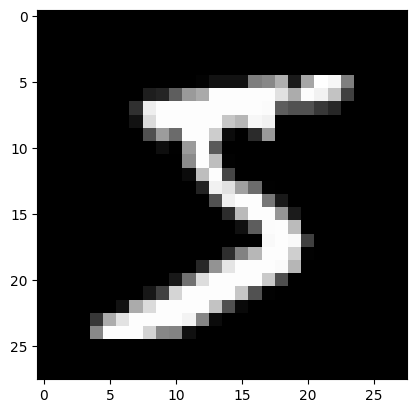

In [12]:
sample_image, sample_label = train_set[0]
plt.imshow(sample_image.squeeze(),cmap='gray')

# sample_image is of the shape (1,28,28) -> you have to squeeze it or you'll get error
# Sometimes people use .numpy() after sample_image when plotting an image. 
# This is unnecessary since matplotlib works fine on PyTorch Tensors.

### DataLoader
`DataLoader` is an iterable that abstracts this complexity for us in an easy API. After we load the dataset into the `DataLoader` and can iterate through the dataset as needed. Each iteration below returns a batch of `train_features` and `train_labels`.

```
DataLoader(
    dataset,
    batch_size=n,
    shuffle=True/False,
 )
```
There are other variables in `DataLoader`, but these three variables are commonly used.
- `dataset`: the dataset you want to load
- `batch_size`: the size of the division of your dataset, where each division is called a batch. If we have 100 training data and the batch size is 10, then in an epoch, we update our parameters 10 times and in each update, we use 10 training data.
- `shuffle`: If shuffle is set to `True`, then all the samples are shuffled and loaded in batches.

In [14]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=train_set,batch_size=64,shuffle=True)
print(train_loader)

After we load our dataset into `train_loader`, we can iterate `train_loader` with `enumerate`. Note that the `samples` in each iteration consists of a tensor of shape `[64, 1, 28, 28]` and a 1-dimensional tensor `[64]` (labels), where `64` is the batch size, meaning that there are 64 images, `1` is the number of channels, and `(28,28)` is (hight,width)=(H,W). If we want to plot an image, we have to specify the index and squeeze it. For example,

In [21]:
# label size
for batch_idx, samples in enumerate(train_loader):
      if batch_idx==0:
        _, sample_labels = samples
        print(sample_labels.size())  # print(sample_labels.shape)

torch.Size([64])


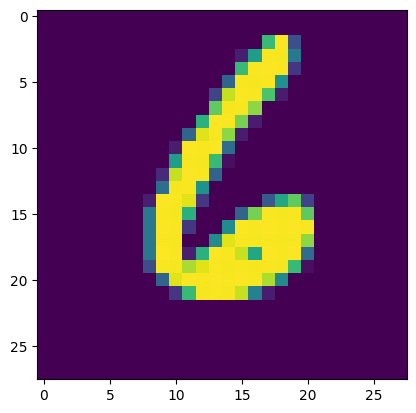

In [17]:
'''
for batch_idx, samples in enumerate(train_loader):
      if batch_idx==0:
        img, _ = samples
        plt.imshow(img)

TypeError: Invalid shape (64, 1, 28, 28) for image data
'''
for batch_idx, samples in enumerate(train_loader):
      if batch_idx==0:
        img, _ = samples
        plt.imshow(img[0].squeeze())

Instead of iterating entire dataset, we can assign `batch_index`, `train_data` and `train_label` in one line:

In [26]:
batch_index, (train_data, train_label) = next(enumerate(train_loader))
print('train data size:',train_data.size())  # train_data.shape
print('train label size:',train_label.size())  #train_label.shape

train data size: torch.Size([64, 1, 28, 28])
train label size: torch.Size([64])


### That's all
These are some details about the MNIST dataset that I did not notice at the beginning. Hope the notes help.